In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from IPython.display import display, HTML
import re

In [2]:
pip install xlrd>=2.0.1

Note: you may need to restart the kernel to use updated packages.


In [3]:
data = pd.read_excel("Dataset Ml.xls")
df = data.copy()

In [4]:
def getting_primary_info(df):
    print("------------------------------------------------------")
    print("Veri setinin şekli", df.shape)
    print("------------------------------------------------------")
    print("Veri seti değişken tipleri:\n", df.dtypes)
    print("------------------------------------------------------")
    print("Veri setinin ilk 5 satırı")
    display(HTML(df.head().to_html()))
    print("------------------------------------------------------")
    print("Veri setinin istatistiki verileri")
    description = df.describe()
    display(HTML(description.to_html()))
    print("------------------------------------------------------")  
getting_primary_info(df)

------------------------------------------------------
Veri setinin şekli (1007, 163)
------------------------------------------------------
Veri seti değişken tipleri:
 Öğrenci No       object
Cinsiyet        float64
Doğum Yılı      float64
Okul Türü         int64
Sınıf Düzeyi      int64
                 ...   
AE                int64
CE-AC           float64
RO-AE             int64
lst               int64
pass              int64
Length: 163, dtype: object
------------------------------------------------------
Veri setinin ilk 5 satırı


,Öğrenci No,Cinsiyet,Doğum Yılı,Okul Türü,Sınıf Düzeyi,Baba Mesleği,Baba Eğitim Düzeyi,Anne Mesleği,Anne Eğitim Düzeyi,Kardeş Sayısı,Kitap Sayısı,Evde Bilgisayar,Evde İnternet,Evde Çalışma Odası,Sınıf 9 Notu,Sınıf 10 Notu,Sınıf 11 Notu,Not Ortalaması aps,Ders Dinleme Önemi,Ders Çalışma Önemi,Ödev Yapma Önemi,Okul Kursu Önemi,Özel Ders Sıklığı,Drsn Fizik Sıklığı,Drsn ÖSS Sıklığı,En sevilen konu,lsi11,lsi12,lsi13,lsi14,lsi21,lsi22,lsi23,lsi24,lsi31,lsi32,lsi33,lsi34,lsi41,lsi42,lsi43,lsi44,lsi51,lsi52,lsi53,lsi54,lsi61,lsi62,lsi63,lsi64,lsi71,lsi72,lsi73,lsi74,lsi81,lsi82,lsi83,lsi84,lsi91,lsi92,lsi93,lsi94,lsi101,lsi102,lsi103,lsi104,lsi111,lsi112,lsi113,lsi114,lsi121,lsi122,lsi123,lsi124,pas1,pas2,pas3,pas4,pas5,pas6,pas7,pas8,pas9,pas10,pas11,pas12,pas13,pas14,pas15,pas16,pas17,pas18,pas19,pas20,pas21,pas22,pas23,pas24,pas25,pas26,pas27,pas28,pas29,pas30,pas31,pas32,pas33,pas34,pas35,pas36,pas37,pas38,pas39,pas40,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,b14,b15,b16,b17,b18,b19,b20,b21,b22,b23,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,CE,RO,AC,AE,CE-AC,RO-AE,lst,pass
0,1-100,1.0,92.0,3,9,12.0,2.0,12.0,2.0,0.0,2.0,1.0,1.0,1.0,3.0,NaN,NaN,3.0,1.0,1.0,1.0,3.0,1,1.0,1.0,6.0,3.0,1.0,2.0,4.0,4.0,2.0,3.0,1.0,1.0,4.0,3.0,2.0,2.0,1.0,3.0,4.0,1.0,3.0,4.0,2.0,1.0,3.0,4.0,2.0,1.0,2.0,4.0,3.0,3.0,1.0,2.0,4.0,2.0,1.0,3.0,4.0,1.0,2.0,4.0,3.0,2.0,3.0,4.0,1.0,4.0,3.0,2.0,1.0,3.0,3.0,2.0,4.0,2.0,2.0,2.0,4.0,3.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,2.0,5.0,3.0,4.0,3.0,5.0,4.0,5.0,2.0,3.0,2.0,3.0,3.0,3.0,2.0,2.0,4.0,3.0,1.0,4.0,3.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0,2,2.0,4.0,3.0,4.0,4.0,2.0,3.0,1.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,4.0,4.0,2.0,4.0,3.0,4.0,3.0,3.0,4.0,4.0,3.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,25.0,26,38,31,-13.0,-5,3,27
1,1-102,2.0,92.0,3,9,12.0,3.0,14.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,NaN,NaN,2.0,1.0,2.0,1.0,3.0,1,1.0,1.0,6.0,3.0,1.0,4.0,2.0,1.0,2.0,4.0,3.0,2.0,1.0,3.0,4.0,2.0,1.0,4.0,3.0,43.0,1.0,2.0,3.0,4.0,2.0,1.0,1.0,2.0,4.0,3.0,3.0,1.0,2.0,4.0,1.0,2.0,4.0,3.0,2.0,1.0,3.0,4.0,1.0,4.0,3.0,2.0,1.0,4.0,2.0,3.0,3.0,3.0,4.0,2.0,2.0,4.0,1.0,2.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0,4.0,3.0,5.0,4.0,4.0,1.0,4.0,4.0,4.0,3.0,1.0,1.0,2.0,2.0,3.0,3.0,1.0,1.0,3.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1,3.0,1.0,4.0,4.0,4.0,2.0,3.0,2.0,3.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,4.0,1.0,4.0,4.0,3.0,3.0,1.0,1.0,3.0,1.0,3.0,3.0,3.0,1.0,1.0,4.0,4.0,69.0,26,37,27,32.0,-1,2,11
2,1-103,2.0,92.0,3,9,11.0,5.0,14.0,2.0,2.0,3.0,0.0,0.0,1.0,2.0,NaN,NaN,2.0,1.0,1.0,1.0,1.0,1,1.0,1.0,6.0,2.0,4.0,3.0,1.0,4.0,3.0,2.0,1.0,2.0,1.0,4.0,3.0,2.0,1.0,4.0,3.0,3.0,4.0,2.0,1.0,4.0,2.0,3.0,1.0,2.0,1.0,3.0,4.0,1.0,4.0,2.0,3.0,4.0,1.0,3.0,2.0,3.0,1.0,4.0,2.0,4.0,1.0,2.0,3.0,4.0,1.0,2.0,3.0,4.0,4.0,2.0,2.0,2.0,2.0,4.0,4.0,3.0,4.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0,3.0,5.0,2.0,5.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,1.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0,1.0,1.0,1.0,4.0,3.0,1.0,1.0,1,3.0,3.0,4.0,4.0,4.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,3.0,2.0,3.0,1.0,3.0,1.0,3.0,4.0,3.0,3.0,1.0,2.0,3.0,3.0,1.0,4.0,3.0,3.0,1.0,3.0,3.0,35.0,24,34,27,1.0,-3,2,8
3,1-105,1.0,92.0,3,9,12.0,4.0,12.0,3.0,1.0,3.0,1.0,1.0,1.0,3.0,NaN,NaN,3.0,1.0,2.0,1.0,2.0,1,1.0,1.0,6.0,1.0,4.0,2.0,3.0,1.0,2.0,4.0,3.0,1.0,2.0,3.0,4.0,1.0,2.0,3.0,4.0,1.0,3.0,4.0,2.0,2.0,1.0,4.0,3.0,2.0,1.0,3.0,4.0,1.0,2.0,3.0,4.0,3.0,1.0,4.0,2.0,3.0,1.0,4.0,2.0,3.0,1.0,2.0,4.0,2.0,4.0,3.0,1.0,3.0,3.0,2.0,3.0,4.0,2.0,1.0,4.0,4.0,3.0,2.0,3.0,4.0,2.0,2.0,2.0,4.0,3.0,4.0,2.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,2.0,2.0,3.0,3.0,1.0,1.0,2.0,3.0,4.0,1.0,3.0,1.0,1.0,2.0,4.0,3.0,3.0,2.0,1.0,1,2.0,4.0,3.0,4.0,4.0,2.0,4.0,1.0,2.0,4.0,1.0,2.0,2.0,3.0,2.0,3.0,4.0,1.0,4.0,4.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,4.0,4.0,1.0,1.0,3.0,3.0,21.0,24,39,36,-18.0,-12,3,31
4,1-106,2.0,92.0,3,9,15.0,3.0,14.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,3.0,1,1.0,2.0,NaN,2.0,4.0,3.0,1.0,1.0,4.0,3.0,2.0,2.0,4.0,1.0,3.0,1.0,2.0,4.0,3.0,4.0,2.0,1.0,3.0,3.0,4.0,2.0,1.0,2.0,4.0,3.0,1.0,2.0,1.0,3.0,4.0,1.0,2.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,4.0,3.0,1.0,3.0,4.0,2.0,1.0,3.0,4.0,2.0,2.0,

------------------------------------------------------
Veri setinin istatistiki verileri


,Cinsiyet,Doğum Yılı,Okul Türü,Sınıf Düzeyi,Baba Mesleği,Baba Eğitim Düzeyi,Anne Mesleği,Anne Eğitim Düzeyi,Kardeş Sayısı,Kitap Sayısı,Evde Bilgisayar,Evde İnternet,Evde Çalışma Odası,Sınıf 9 Notu,Sınıf 10 Notu,Sınıf 11 Notu,Not Ortalaması aps,Ders Dinleme Önemi,Ders Çalışma Önemi,Ödev Yapma Önemi,Okul Kursu Önemi,Özel Ders Sıklığı,Drsn Fizik Sıklığı,Drsn ÖSS Sıklığı,En sevilen konu,lsi11,lsi12,lsi13,lsi14,lsi21,lsi22,lsi23,lsi24,lsi31,lsi32,lsi33,lsi34,lsi41,lsi42,lsi43,lsi44,lsi51,lsi52,lsi53,lsi54,lsi61,lsi62,lsi63,lsi64,lsi71,lsi72,lsi73,lsi74,lsi81,lsi82,lsi83,lsi84,lsi91,lsi92,lsi93,lsi94,lsi101,lsi102,lsi103,lsi104,lsi111,lsi112,lsi113,lsi114,lsi121,lsi122,lsi123,lsi124,pas1,pas2,pas3,pas4,pas5,pas6,pas7,pas8,pas9,pas10,pas11,pas12,pas13,pas14,pas15,pas16,pas17,pas18,pas19,pas20,pas21,pas22,pas23,pas24,pas25,pas26,pas27,pas28,pas29,pas30,pas31,pas32,pas33,pas34,pas35,pas36,pas37,pas38,pas39,pas40,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,b14,b15,b16,b17,b18,b19,b20,b21,b22,b23,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,CE,RO,AC,AE,CE-AC,RO-AE,lst,pass
count,1006.000000,1006.000000,1007.00000,1007.000000,979.000000,993.000000,996.000000,1001.000000,1003.000000,997.000000,1006.000000,1006.000000,1006.000000,974.00000,646.000000,234.000000,978.000000,1004.000000,999.000000,998.000000,960.0000,1007.000000,1006.000000,1005.000000,985.000000,989.000000,992.000000,990.000000,990.000000,987.000000,988.000000,988.000000,987.000000,976.000000,976.000000,977.000000,976.000000,985.000000,986.000000,987.000000,987.000000,977.000000,978.000000,976.000000,977.000000,987.000000,989.000000,987.000000,987.000000,984.000000,985.000000,985.000000,987.000000,985.000000,985.000000,986.000000,986.000000,980.000000,981.000000,981.000000,983.000000,982.000000,982.000000,982.000000,984.000000,987.000000,986.000000,986.000000,987.000000,985.000000,987.000000,985.000000,985.000000,1002.000000,1002.000000,1003.000000,1003.000000,997.000000,1001.000000,1000.000000,994.000000,998.000000,1002.000000,1002.000000,1001.000000,1000.000000,1001.000000,1002.000000,997.000000,1000.000000,1006.000000,1004.000000,1001.000000,999.000000,997.000000,1000.000000,998.000000,1003.000000,1001.000000,998.000000,999.000000,993.000000,993.000000,992.000000,997.000000,1001.000000,1001.000000,999.000000,996.000000,998.000000,1001.000000,1001.000000,1004.000000,1003.000000,1003.000000,999.000000,1001.000000,1000.000000,1002.000000,1004.000000,1007.000000,1005.000000,1005.000000,1002.000000,1005.000000,1006.000000,998.000000,999.000000,1005.000000,1000.000000,1005.000000,1005.000000,997.000000,997.000000,987.000000,990.000000,995.000000,999.000000,995.000000,995.000000,993.000000,993.000000,997.000000,997.000000,998.000000,998.000000,997.000000,998.000000,999.000000,997.000000,995.000000,999.000000,994.000000,998.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000
mean,1.503976,90.546720,2.48858,9.929494,12.899898,3.853978,13.644578,3.118881,1.569292,3.141424,0.711730,0.457256,0.870775,3.74538,3.431889,4.098291,3.525392,1.205179,1.536537,1.570140,2.6625,1.393247,2.465209,2.626866,8.006091,1.649141,3.119960,2.933333,2.569697,1.606890,3.314777,2.814777,2.702128,2.165984,1.972336,3.401228,2.577869,1.301523,2.772819,2.953394,3.271530,2.320368,2.627812,2.720287,2.719550,1.751773,3.030334,3.100304,2.349544,1.770325,2.650761,2.679188,3.248227,2.313706,2.025381,2.664300,3.294118,1.357143,2.682977,2.831804,3.446592,2.477597,1.786151,3.162933,2.761179,2.462006,2.559838,2.607505,2.757852,2.500508,3.131712,2.578680,2.323858,2.582834,2.883234,2.142572,3.061815,3.733200,2.010989,2.378000,3.989940,3.278557,2.726547,2.879242,3.102897,3.577000,1.953047,2.732535,3.391174,3.370000,3.489066,4.144422,2.473526,3.398398,3.441324,3.817000,3.352705,4.126620,4.046953,3.994990,2.458458,2.084592,2.127895,3.669355,3.070211,2.687313,2.393606,3.232232,3.572289,3.070140,2.228771,3.716284,2.648406,1.551346,2.160518,3.364364,2.459540,3.079000

------------------------------------------------------


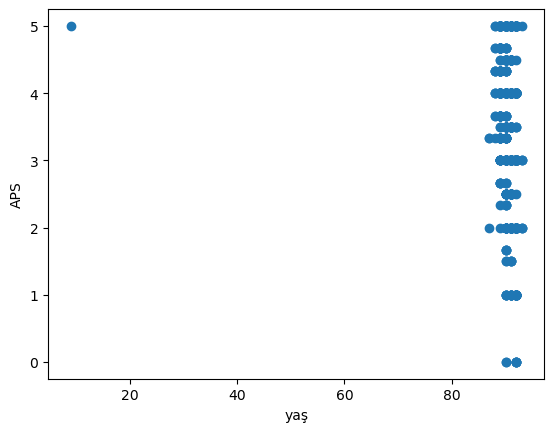

----------------------------------------------


In [5]:
plt.scatter(x = "Doğum Yılı" , y = "Not Ortalaması aps", data = df)
plt.xlabel("yaş")
plt.ylabel('APS')
plt.show()
print("----------------------------------------------")

In [6]:
df.query("`Doğum Yılı` ==  87")

,Öğrenci No,Cinsiyet,Doğum Yılı,Okul Türü,Sınıf Düzeyi,Baba Mesleği,Baba Eğitim Düzeyi,Anne Mesleği,Anne Eğitim Düzeyi,Kardeş Sayısı,...,c11,c12,CE,RO,AC,AE,CE-AC,RO-AE,lst,pass
532,7-33,2.0,87.0,1,11,15.0,2.0,14.0,0.0,4.0,...,4.0,4.0,26.0,34,25,35,1.0,-1,2,27
824,12-1277,1.0,87.0,1,11,15.0,2.0,14.0,2.0,4.0,...,4.0,4.0,21.0,29,28,42,-7.0,-13,3,13
998,14-x38,2.0,87.0,2,11,12.0,2.0,14.0,2.0,2.0,...,4.0,4.0,38.0,40,40,44,-2.0,-4,3,21


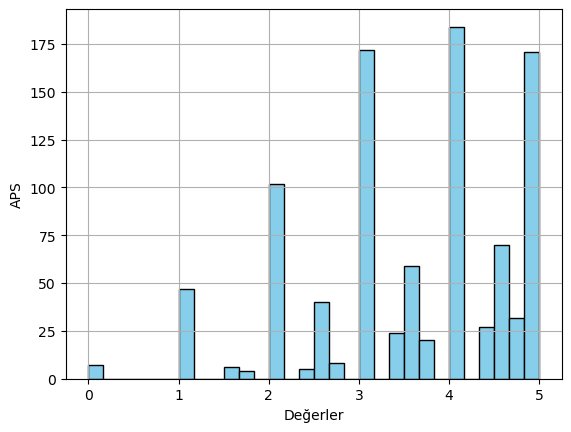

In [7]:
plt.hist(df["Not Ortalaması aps"], bins=30, color='skyblue', edgecolor='black') 
plt.xlabel('Değerler')
plt.ylabel('APS')
plt.grid(True)
plt.show()

In [8]:
df["Cinsiyet"].value_counts()
df["Cinsiyet"] = df["Cinsiyet"].fillna(1)

In [9]:
df["En sevilen konu"].value_counts()
df["En sevilen konu"] = df["En sevilen konu"].fillna(12)


In [10]:
df["Doğum Yılı"].value_counts()
df["Doğum Yılı"] = df["Doğum Yılı"].fillna(90)


In [11]:
df.drop(columns = ["Sınıf 11 Notu"])

,Öğrenci No,Cinsiyet,Doğum Yılı,Okul Türü,Sınıf Düzeyi,Baba Mesleği,Baba Eğitim Düzeyi,Anne Mesleği,Anne Eğitim Düzeyi,Kardeş Sayısı,...,c11,c12,CE,RO,AC,AE,CE-AC,RO-AE,lst,pass
0,1-100,1.0,92.0,3,9,12.0,2.0,12.0,2.0,0.0,...,4.0,4.0,25.0,26,38,31,-13.0,-5,3,27
1,1-102,2.0,92.0,3,9,12.0,3.0,14.0,2.0,2.0,...,4.0,4.0,69.0,26,37,27,32.0,-1,2,11
2,1-103,2.0,92.0,3,9,11.0,5.0,14.0,2.0,2.0,...,3.0,3.0,35.0,24,34,27,1.0,-3,2,8
3,1-105,1.0,92.0,3,9,12.0,4.0,12.0,3.0,1.0,...,3.0,3.0,21.0,24,39,36,-18.0,-12,3,31
4,1-106,2.0,92.0,3,9,15.0,3.0,14.0,2.0,3.0,...,4.0,4.0,27.0,38,31,24,-4.0,14,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,14-x42,1.0,89.0,2,11,20.0,2.0,14.0,2.0,3.0,...,4.0,4.0,0.0,0,0,0,0.0,0,1,18
1003,14-x43,2.0,89.0,2,11,4.0,5.0,14.0,2.0,3.0,...,3.0,4.0,16.0,24,42,38,-26.0,-14,3,13
1004,14-x44,1.0,89.0,2,11,11.0,4.0,14.0,3.0,2.0,...,4.0,4.0,0.0,0,0,0,0.0,0,1,37
1005,14-x45,1.0,90.0,2,11,1.0,5.0,21.0,5.0,1.0,...,4.0,3.0,17.0,24,44,35,-27.0,-11,3,59


In [12]:
df.drop(columns = "Öğrenci No", inplace = True)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

df = df.dropna()

X, y = df.drop(columns=["pass", "lst", "Not Ortalaması aps"]), df["Not Ortalaması aps"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

y_pred_linear_test = model_linear.predict(X_test)
r2_linear_test = r2_score(y_test, y_pred_linear_test)
print("Lineer Regression Test R^2 Score:", r2_linear_test)

y_pred_linear_train = model_linear.predict(X_train)
r2_linear_train = r2_score(y_train, y_pred_linear_train)
print("Lineer Regression Train R^2 Score:", r2_linear_train)
print("-----------------------------------")
model_random_forest = RandomForestRegressor(n_estimators=100, min_samples_split=2)
model_random_forest.fit(X_train, y_train)

y_pred_rf_test = model_random_forest.predict(X_test)
r2_rf_test = r2_score(y_test, y_pred_rf_test)
print("Random Forest Test R^2 Score:", r2_rf_test)

y_pred_rf_train = model_random_forest.predict(X_train)
r2_rf_train = r2_score(y_train, y_pred_rf_train)
print("Random Forest Train R^2 Score:", r2_rf_train)
print("-----------------------------------")

model_gradient_boosting = GradientBoostingRegressor(n_estimators=80, min_samples_split=2)
model_gradient_boosting.fit(X_train, y_train)

y_pred_gb_test = model_gradient_boosting.predict(X_test)
r2_gb_test = r2_score(y_test, y_pred_gb_test)
print("Gradient Boosting Test R^2 Score:", r2_gb_test)

y_pred_gb_train = model_gradient_boosting.predict(X_train)
r2_gb_train = r2_score(y_train, y_pred_gb_train)
print("Gradient Boosting Train R^2 Score:", r2_gb_train)


Lineer Regression Test R^2 Score: 0.9415205856047371
Lineer Regression Train R^2 Score: 1.0
-----------------------------------
Random Forest Test R^2 Score: 0.8728767381416505
Random Forest Train R^2 Score: 0.988389815117558
-----------------------------------
Gradient Boosting Test R^2 Score: 0.9431738982570667
Gradient Boosting Train R^2 Score: 0.9999109335306359


In [14]:
df = df.dropna()
X, y = df.drop(columns=["pass", "lst", "Not Ortalaması aps"]), df["lst"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("Lineer Reg Test R-squared:", r2)

y_pred_train = model.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
print("Lineer Reg Train R-squared:", r2_train)

print("-----------------------------------")

model_random_forest = RandomForestRegressor(n_estimators=100, min_samples_split=2)
model_random_forest.fit(X_train, y_train)

y_pred = model_random_forest.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("Random Forest Test R^2 Score:", r2)


y_pred_rf_train = model_random_forest.predict(X_train)
r2_rf_train = r2_score(y_train, y_pred_rf_train)
print("Random Forest Train R^2 Score:", r2_rf_train)

print("-----------------------------------")

model = GradientBoostingRegressor(n_estimators=80, min_samples_split=2)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Gradient Boosting Test R^2 Score:", r2)


y_pred_gb_train = model.predict(X_train)
r2_gb_train = r2_score(y_train, y_pred_gb_train)
print("Gradient Boosting Train R^2 Score:", r2_gb_train)


Lineer Reg Test R-squared: -0.6638937244373464
Lineer Reg Train R-squared: 1.0
-----------------------------------
Random Forest Test R^2 Score: 0.9907547008547009
Random Forest Train R^2 Score: 0.9917107212205271
-----------------------------------
Gradient Boosting Test R^2 Score: 0.9999999522673271
Gradient Boosting Train R^2 Score: 0.9999999522688926


In [15]:
df = df.dropna()
X, y = df.drop(columns=["pass", "lst", "Not Ortalaması aps"]), df["pass"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("Lineer Reg Test R-squared:", r2)

y_pred_train = model.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
print("Lineer Reg Train R-squared:", r2_train)

print("-----------------------------------")

model_random_forest = RandomForestRegressor(n_estimators=100, min_samples_split=2)
model_random_forest.fit(X_train, y_train)

y_pred = model_random_forest.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("Random Forest Test R^2 Score:", r2)


y_pred_rf_train = model_random_forest.predict(X_train)
r2_rf_train = r2_score(y_train, y_pred_rf_train)
print("Random Forest Train R^2 Score:", r2_rf_train)

print("-----------------------------------")

model = GradientBoostingRegressor(n_estimators=80, min_samples_split=2)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Gradient Boosting Test R^2 Score:", r2)


y_pred_gb_train = model.predict(X_train)
r2_gb_train = r2_score(y_train, y_pred_gb_train)
print("Gradient Boosting Train R^2 Score:", r2_gb_train)


Lineer Reg Test R-squared: 0.9995979863941478
Lineer Reg Train R-squared: 1.0
-----------------------------------
Random Forest Test R^2 Score: 0.8572814191948919
Random Forest Train R^2 Score: 0.9803305364762334
-----------------------------------
Gradient Boosting Test R^2 Score: 0.9238559682091917
Gradient Boosting Train R^2 Score: 0.9996604276578465
